# Hypothesis testing: 2-Sample t-test

In this notebook we'll show you how to calculate a two-sample t-test. We'll do this twice. 
* First, we'll go through the approach manually so you can see the maths and reasoning behind what we're doing - this should help with comprehension and help you to design better experiments.
* Second, we'll go through the shorter coding way, where a computer will do all the work for you, but won't tell you why, it's a black box of numbers.

# I.&nbsp; The  manual approach

## 1.&nbsp; Define the initial question for which the truth is not known.

Watch this Khan Academy video to get the context of the example we will use in this notebook: https://www.youtube.com/watch?v=NkGvw18zlGQ

We want to test the effect of using two different fertilizers on tomato plants. For this, we apply these two fertilizers to the plants in two fields, A and B, and wait for the plants to grow.
Then, we take two random samples of plants from both fields and measure their heights.
Our goal is to determine if the plants exposed to one of the two fertilizers have grown higher, on average. 

## 2.&nbsp; State the Null Hypothesis and the Alternative Hypothesis.

Null Hypothesis ($H_0$): mean height of plants in field A = mean height of plants in field B
  * the difference between the mean height of the plants in fields A and B (expressed as d) is zero, so **d = 0**

Alternative Hypothesis ($H_A$): mean height of plants in field A != mean height of plants in field B
  * the difference between the mean height of the plants in fields A and B is not zero, so **d != 0**

## 3.&nbsp; Select an appropriate significance level alpha ($\alpha$).

The alpha used in this case is 0.05.

In [1]:
alpha = 0.05

## 4.&nbsp; Consider the statistical assumptions about the set of data.

**Statology** is a great website to find out more and guide you on what assumptions should be made. [Here's their page on the two-sample t-test](https://www.statology.org/two-sample-t-test/).

For the results of a 2-sample t-test to be valid, the following assumptions should be met:

1. The observations in one sample should be independent of the observations in the other sample.
2. The data should be approximately normally distributed.
3. The two samples should have approximately the same variance. (If this assumption is not met, you should instead perform a Welch’s t-test.)
4. The data in both samples was obtained using a random sampling method.

### 4.1&nbsp;The observations in one sample should be independent of the observations in the other sample.

This needs to be ensured while collecting the data. At this point, we will assume that the plants were selected randomly, and that thus, their heights are independent.

Condition fulfilled.

### 4.2&nbsp; The data should be approximately normally distributed.

Below is the collected data from the two fields:

> *Note: we generated 2 samples with the same means and standard deviations of fields A and B as shown in Khan Academy's video, so you can follow the video and the code along in parallel.*

In [2]:
import pandas as pd
import numpy as np

In [3]:
# The plant heights from field A:
f_a = np.array([1.53021758, 0.70571215, 2.01610148, 1.14367405, 0.93970563,
       1.74358147, 1.72979421, 0.99173825, 1.30784819, 0.18865752,
       1.92501786, 1.79597301, 1.77666206, 0.54937259, 1.13296132,
       1.40105918, 1.60272671, 1.44154697, 1.9605791 , 0.52757822,
       1.19867684, 0.99201533])

print("Mean plant height in field A:", round(np.mean(f_a), 3))
print("Standard deviation of plant heights in field A:", round(np.std(f_a), 3))
print("Number of plants from field A:", len(f_a))

Mean plant height in field A: 1.3
Standard deviation of plant heights in field A: 0.5
Number of plants from field A: 22


In [4]:
# The plant heights from field B:
f_b = np.array([1.65802641, 1.76603167, 1.89544547, 1.45920841, 1.80266623,
       0.80989183, 1.54506744, 1.85769076, 1.48064793, 1.7310313 ,
       1.91207357, 1.71378148, 1.70911519, 1.56339253, 1.63741389,
       1.50316156, 1.85250241, 2.15778815, 1.62285988, 1.43006622,
       1.61084258, 0.97720672, 1.67433766, 1.03085296])

print("Mean plant height in field B:", round(np.mean(f_b), 3))
print("Standard deviation of plant heights in field B:", round(np.std(f_b), 3))
print("Number of plants from field B:", len(f_b))

Mean plant height in field B: 1.6
Standard deviation of plant heights in field B: 0.3
Number of plants from field B: 24


The difference between the observed sample means is `0.3`:

In [5]:
round(np.mean(f_b) - np.mean(f_a), 2)

0.3

In [6]:
import matplotlib.pyplot as plt

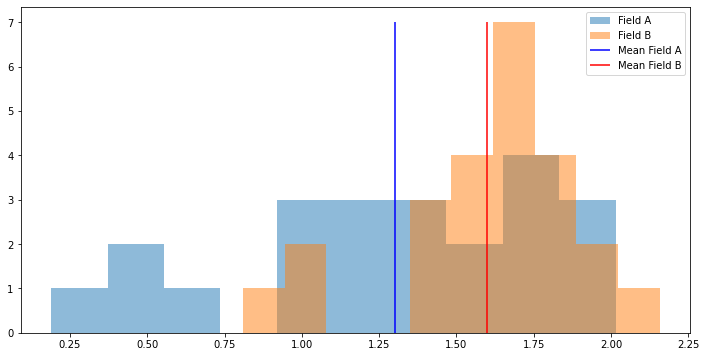

In [7]:
# @title Histogram
plt.figure(figsize=(12,6))
# Plot a histogram of the plants' heights.
ya, xa, _ = plt.hist(f_a, bins=10, alpha=0.5, label="Field A")
yb, xb, _ = plt.hist(f_b, bins=10, alpha=0.5, label="Field B")
# Add a vertical line for the mean of field A.
plt.vlines(np.mean(f_a), ymin=0, ymax=max(max(ya), max(yb)), color="blue", label="Mean Field A")
# Add a vertical line for the mean of field B.
plt.vlines(np.mean(f_b), ymin=0, ymax=max(max(ya), max(yb)), color="red", label="Mean Field B")
plt.legend()
plt.show()

The heights are very approximately normally distributed.

Condition fulfilled.

### 4.3&nbsp; The two samples should have approximately the same variance.

In [8]:
# Calculate the variance for the plant heights from field A.
var_a = np.var(f_a)
var_a

0.2500038923698874

In [9]:
# Calculate the variance for the plant heights from field B.
var_b = np.var(f_b)
var_b

0.09001304397217041

As is usually the case in practice, the variances of the two samples are not equal.

For this reason, some people even argue that a Welch's test should always be chosen over a 2-sample t-test: it takes the differences between the variances into account, and returns the same result as the 2-sample t-test whenever variances are equal.

We will perform a quick Welch's in the manual calculation.

### 4.4&nbsp; The data in both samples was obtained using a random sampling method.

This needs to be ensured while collecting the data. At this point, we will assume that the plants were selected randomly.

Condition fulfilled.

## 5.&nbsp; Decide on the appropriate test to use and the associated test statistic.

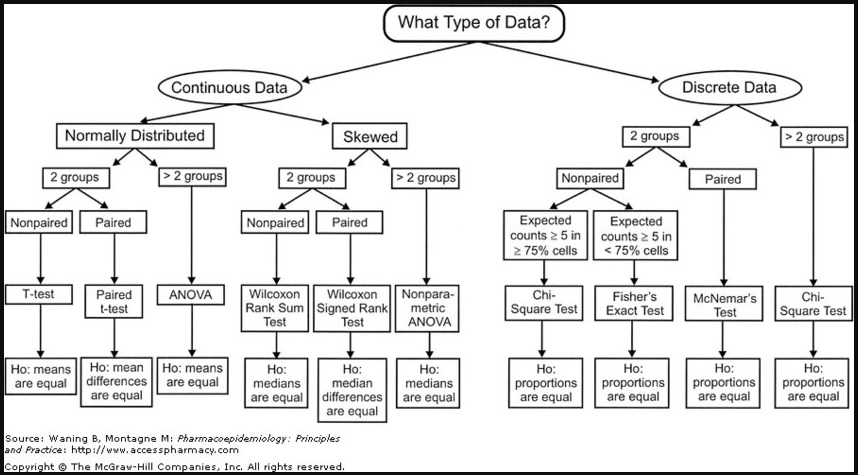

Comparing the means of two samples with each other is done using a **2-sample t-test**.

The associated test statistic is the t-score: 
$t = \frac{\bar{x_1} – \bar{x_2}} {\sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}}}$

where

$\bar{x_1}$ = mean of sample 1

$\bar{x_2}$ = mean of sample 2

$s^2_1$ = variance of sample 1

$s^2_2$ = variance of sample 2

$n_1$ = size of sample 1

$n_2$ = size of sample 2

## 6.&nbsp; Derive the distribution of the test statistic under the Null Hypothesis from the assumptions.

The t-score follows a student's t-distribution with n-1 degrees of freedom.
The conservative approach is to take as n the smaller of the sample sizes.

In [10]:
# Get the sample sizes from both fields.
n_a = len(f_a)
n_b = len(f_b)
print("Number of plants from field A: ", n_a)
print("Number of plants from field B: ", n_b)

Number of plants from field A:  22
Number of plants from field B:  24


In [42]:
# Calculate the degrees of freedom always from the smaller batch
degrees_of_freedom = min(n_a, n_b) - 1
degrees_of_freedom

21

Let's plot a t-distribution with 21 degrees of freedom.

In [12]:
from scipy.stats import t

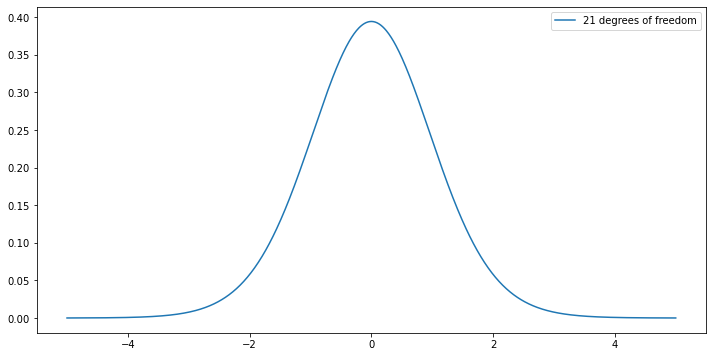

In [13]:
# @title t-distribution
plt.figure(figsize=(12,6))
# Create a linear space from -5 to 5 with 1000 intervals for our x-axis.
xt = np.linspace(-5,5,1000)
# Plot t-distributions with different degrees of freedom.
plt.plot(xt, t.pdf(xt,21), label="21 degrees of freedom")
plt.legend()
plt.show()

## 7.&nbsp; Compute the test statistic using the data set.

Remember that $t = \frac{\bar{x_1} – \bar{x_2}} {\sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}}}$

In [14]:
# x1 = mean from field A
x_a = np.mean(f_a)
x_a

1.300054532727273

In [15]:
# x2 = mean from field B
x_b = np.mean(f_b)
x_b

1.6000459270833332

Remember that we need to specify the delta degrees of freedom (ddof) as 1 in order to calculate the sample standard deviation (ddof = sample size - degrees of freedom).

By default, ddof = 0, which would give the population standard deviation.

In [16]:
# s1 = standard deviation from field A
s_a = np.std(f_a, ddof=1)
s_a

0.5117702996712454

In [17]:
# s2 = standard deviation from field B
s_b = np.std(f_b, ddof=1)
s_b

0.30647455780155075

In [18]:
# n1 = sample size from field A
# n2 = sample size from field B
print("Number of plants from field A: ", n_a)
print("Number of plants from field B: ", n_b)

Number of plants from field A:  22
Number of plants from field B:  24


In [19]:
# Calculate the t-score with the values from above.
t_score = (x_a - x_b) / np.sqrt((s_a**2 / n_a) + (s_b**2) / n_b)
t_score

-2.3852030326883225

Let's see where the t-score is positioned relative to the t-distribution. 

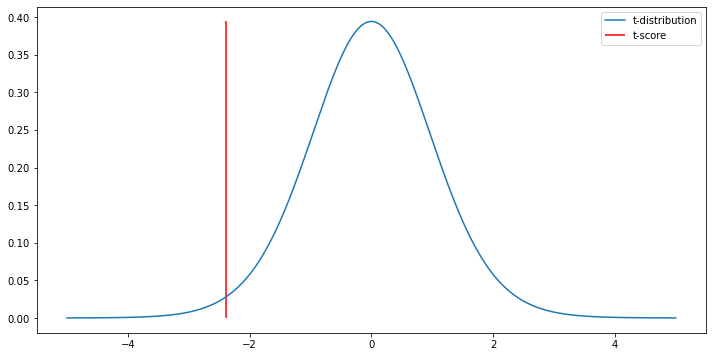

In [20]:
#@title t-distribution and t-score
plt.figure(figsize=(12,6))
# Plot a t-distribution with the degrees of freedom from our sample.
plt.plot(xt, t.pdf(xt,degrees_of_freedom), label="t-distribution")
# Add a vertical line for the t-score.
plt.vlines(t_score, ymin=0, ymax=max(t.pdf(xt,degrees_of_freedom)), color="red", label="t-score")
plt.legend()
plt.show()

## 8.&nbsp;Derive the critical region associated with the level of alpha.

Not too long ago, people used large tables to look up the critical values associated with a certain level of alpha, such as the one for the t-statistic below from [here](https://www.statology.org/here-is-how-to-find-the-p-value-from-the-t-distribution-table/).

In the columns at the top, you need to select the level of alpha (make sure to look at the appropriate type of test, one-tailed or two-tailed).

In our case, alpha is 0.05, and we choose to perform a two-tailed test.

Then you select the degrees of freedom of the test statistic's distribution in the first row. For any distribution with a different degree of freedom than the ones listed, the critical value will only be an approximation. In our case, the degrees of freedom is 21.

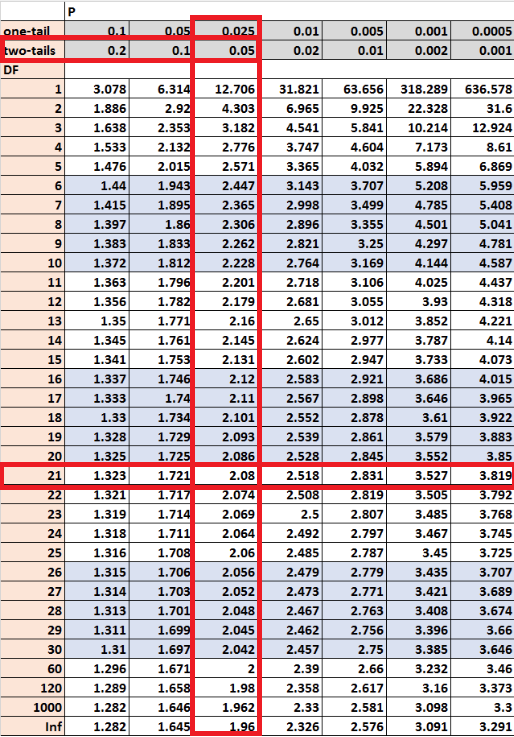

In [21]:
critical_value = 2.08

Let's plot the t-distribution with our test statistic again.

This time, we want to add the critical values in order to determine the critical region.

Notice that the area shaded in blue under the distribution curve covers all values on the x-axis that are more extreme than our critical values. This area is the alpha, and corresponds thus to about 5% of the total area under the curve.

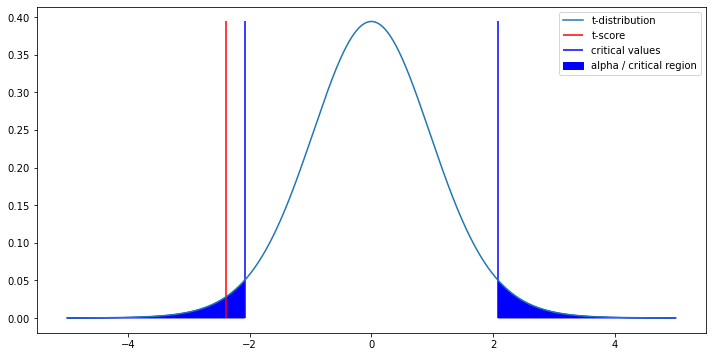

In [22]:
#@title t-distribution, t-score and critical region
plt.figure(figsize=(12,6))
# Plot a t-distribution with the degrees of freedom from our sample.
plt.plot(xt, t.pdf(xt,degrees_of_freedom), label="t-distribution")
# Add a vertical line for the t-score.
plt.vlines(t_score, ymin=0, ymax=max(t.pdf(xt,degrees_of_freedom)), color="red", label="t-score")
# Add vertical lines for the critical values.
plt.vlines(-critical_value, ymin=0, ymax=max(t.pdf(xt,degrees_of_freedom)), color="blue", label="critical values")
plt.vlines(critical_value, ymin=0, ymax=max(t.pdf(xt,degrees_of_freedom)), color="blue")
# Shade the area under the curve for values more extreme than +/-the critical value (= alpha).
plt.fill_between(xt, t.pdf(xt,degrees_of_freedom), where=(-critical_value>xt)|(xt>critical_value), color= "b", label="alpha / critical region")
plt.legend()
plt.show()

## 9.&nbsp; Compare the test statistic with the critical values.

The test statistic is in the critical region because it is more extreme than one of the critical values.

For this reason, the Null Hypothesis will be rejected.

We can assume that the difference in height of the plants from the different fields is not purely due to chance. On the contrary, it is likely that the plants on the different fields have different heights due to the usage of the different fertilizers.

# II. The coder's approach for step 6 - 9

The faster way is to use [scipy's function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to perform 2-sample t-tests.

To determine whether or not to reject the Null Hypothesis, it is common to compare the alpha to the so-called p-value (instead of comparing the test statistic to the critical region).

> **Note**: Whether you compare alpha to the p-value or the test statistic to the critical values/regions is a matter of personal taste. The result itself will always be the same.

You can see this in the chart below:

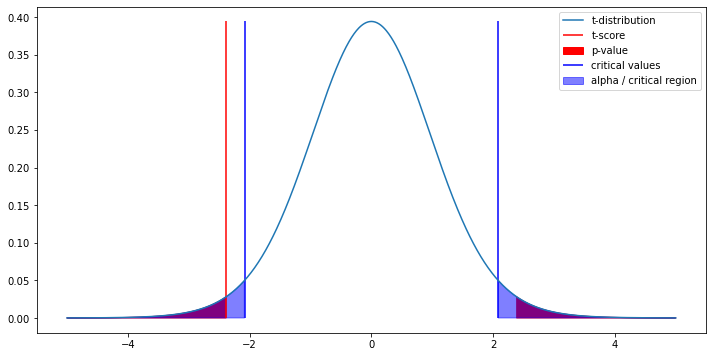

In [23]:
#@title t-distribution, t-score, critical region and alpha
plt.figure(figsize=(12,6))
# Plot a t-distribution with the degrees of freedom from our sample.
plt.plot(xt, t.pdf(xt,degrees_of_freedom), label="t-distribution")
# Add a vertical line for the t-score.
plt.vlines(t_score, ymin=0, ymax=max(t.pdf(xt,degrees_of_freedom)), color="red", label="t-score")
# Shade the region in the tails that is more extreme than the +/-t-score (= p-value).
plt.fill_between(xt, t.pdf(xt,degrees_of_freedom), where=(-abs(t_score)>xt)|(xt>abs(t_score)), color= "r", label="p-value")
# Add vertical lines for the critical values.
plt.vlines(-2.08, ymin=0, ymax=max(t.pdf(xt,degrees_of_freedom)), color="blue", label="critical values")
plt.vlines(2.08, ymin=0, ymax=max(t.pdf(xt,degrees_of_freedom)), color="blue")
# Shade the area under the curve for values more extreme than +/-2.08 (= alpha).
plt.fill_between(xt, t.pdf(xt,degrees_of_freedom), where=(-2.08>xt)|(xt>2.08), color= "b", alpha=0.5, label="alpha / critical region")
plt.legend()
plt.show()

## Two sample t-test with same variance

In [24]:
from scipy.stats import ttest_ind

Scipy's t-test for the means of two independent samples of scores assumes by default that the populations have identical variances.

In [25]:
tscore, pvalue = ttest_ind(a = f_a, b = f_b, alternative='two-sided')

In [26]:
tscore

-2.4358329090845103

In [27]:
pvalue

0.0189763029680601

Check whether the t-score calculated manually and the one calculated using scipy are the same.

In [48]:
tscore.round(2) == t_score.round(2)

False

In [46]:
tscore

-2.4358329090845103

In [47]:
t_score

-2.3852030326883225

## Two sample t-test with different variances - Welch's Test

Let's run the test again, this time without the equal variance assumption.

> Note: This is the famous Welch's test to be used when the two samples have different variances.

In [29]:
tscore_2, pvalue_2 = ttest_ind(a = f_a, b = f_b, alternative='two-sided', equal_var=False)

In [30]:
tscore_2

-2.3852030326883225

In [31]:
pvalue_2

0.022832240813686074

Check whether the t-score calculated manually and the one calculated using scipy (correcting for unequal variances = Welch's test) are the same.

In [32]:
tscore_2 == t_score

True

SUCCESS!

In [33]:
if pvalue > alpha:
  print("The p-value is larger than alpha.")
else:
  print("The p-value is smaller than alpha.")

The p-value is smaller than alpha.


Does this mean that we should reject the Null Hypothesis - or not?

Since the p-value is smaller than the alpha, we reject the Null Hypothesis.

> Remember: **If the p is low, the Null must go!**

# III.&nbsp; Exercise

You have created an an experiment with two versions of a webpage. The metric you compare is the session time each user stays on the page. 

If your confidence level is 90%, is there a statistically significant difference between the two pages?

In [34]:
# session_times.csv
url = 'https://drive.google.com/file/d/1nYRMCgv3OKaiIUDBPgq-EnE2sWhgrJI3/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
session_times = pd.read_csv(path)

session_times.head()

,Page,Time
0,Page A,21.0
1,Page B,253.0
2,Page A,35.0
3,Page B,71.0
4,Page A,67.0


In [35]:
session_times.Page.value_counts()

Page A    21
Page B    15
Name: Page, dtype: int64

In [50]:
n_a = 24
n_b = 15

### Exercise solution

Follow these steps

1. Find the observed difference between the mean session time fo the two pages.

2. Establish the Null and the Alternative Hypotheses.

3. Define your alpha.

4. Filter the dataframe `session_times` so that you can have two Pandas Series with the session times for Page A and Page B.

5. Use Scipy to find the p-value.

6. State the result of the experiment and the interpretation of the p-value.

#### 1. Define the initial question

In [36]:
# Your code here.
Are the means of the session times similar? 

#### 2. Establish the Null and the Alternative Hypotheses.

H0 is the average height of the plants in 

Null Hypothesis ($H_0$): mean session time of page A = mean session time of page B
  * the difference between the mean session time of page A and B (expressed as d) is zero, so **d = 0**

Alternative Hypothesis ($H_A$): mean session time of page A = mean session time of page B
  * the difference between the mean session time of page A and B is not zero, so **d != 0**


#### 3 Define and interpret your alpha.

In [79]:
# Your code here.
alpha_2 = 0.1

#### 4-A Filter the dataframe `session_times` so that you can have two Pandas Series with the session times for Paga A and Page B.

In [80]:
# Your code here.
p_a = session_times.loc[session_times.Page == "Page A", "Time"]

p_b = session_times.loc[session_times.Page == "Page B", "Time"]

round(np.mean(p_b) - np.mean(p_a), 2)

35.67

#### 4-B Assumptions

1. The observations in one sample should be independent of the observations in the other sample.
2. The data should be approximately normally distributed.
3. The two samples should have approximately the same variance. (If this assumption is not met, you should instead perform a Welch’s t-test.)
4. The data in both samples was obtained using a random sampling method.

In [ ]:
# for 1 - yes are independent

<AxesSubplot:>

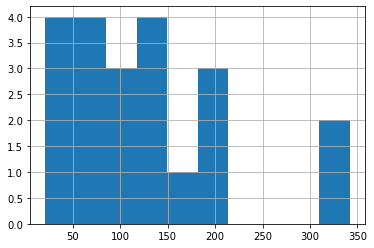

In [81]:
# for 2 - 
p_a.hist(bins=10)

<AxesSubplot:>

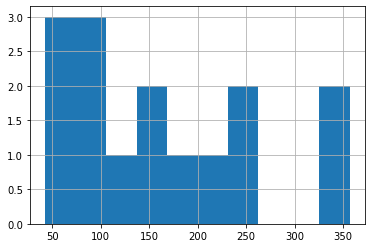

In [82]:
p_b.hist(bins=10)

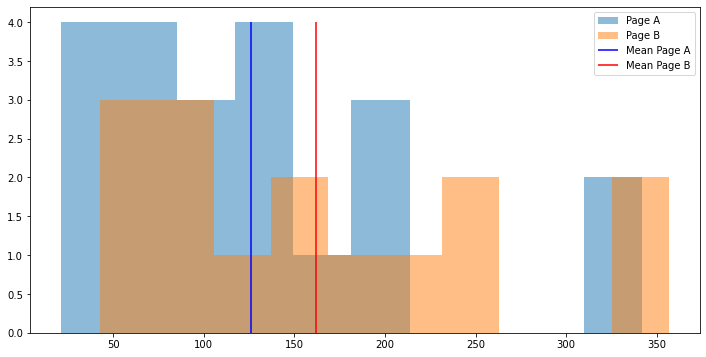

In [69]:
plt.figure(figsize=(12,6))
# Plot a histogram of the plants' heights.
ya, xa, _ = plt.hist(p_a, bins=10, alpha=0.5, label="Page A")
yb, xb, _ = plt.hist(p_b, bins=10, alpha=0.5, label="Page B")
# Add a vertical line for the mean of field A.
plt.vlines(np.mean(p_a), ymin=0, ymax=max(max(ya), max(yb)), color="blue", label="Mean Page A")
# Add a vertical line for the mean of field B.
plt.vlines(np.mean(p_b), ymin=0, ymax=max(max(ya), max(yb)), color="red", label="Mean Page B")
plt.legend()
plt.show()

In [83]:
# for 3 - 

var_a_2 = np.var(p_a)
var_a_2

7453.079365079368

In [84]:
var_b_2 = np.var(p_b)
var_b_2

9546.666666666666

**for 3.: The variance is different. So we take the Welch Test (which is basically the same t-test with some parameter changed)**

for 4 - yes true

#### 5. Use Scipy to find the p-value.

In [74]:
# Your code here.
tscore_3, pvalue_3 = ttest_ind(a = p_a, b = p_b, alternative='two-sided', equal_var=False)

In [76]:
tscore_3

-1.098315562363811

In [77]:
pvalue_3

0.2815243724570061

#### 6. State the result of the experiment and the interpretation of the p-value.

In [85]:
if pvalue_3 > alpha_2:
  print("The p-value is larger than alpha. We accept the H0-Hypothesis.")
else:
  print("The p-value is smaller than alpha. We reject the H0-Hypothesis.")

The p-value is larger than alpha. We accept the H0-Hypothesis.


In [41]:
# Your code here.